Q1. What is the mathematical formula for a linear SVM?

The decision boundary of a linear SVM is represented by a hyperplane with the equation:

w^T x + b = 0

where:

w: weight vector containing coefficients for each feature.
x: input data point (feature vector).
b: bias term.
This formula calculates the dot product of the weight vector and the data point, plus the bias, to determine on which side of the hyperplane the point lies. Points above the hyperplane are classified as one class, and points below as the other.



Q2. What is the objective function of a linear SVM?

The objective of a linear SVM is to maximize the margin between the hyperplane and the closest data points of each class (support vectors). This is achieved by minimizing a cost function:

1/2 ||w||^2 + C * Σ max(0, 1 - y_i(w^T x_i + b))

where:

||w||^2: regularization term penalizing large weights (complexity control).
C: hyperparameter controlling the trade-off between margin maximization and misclassification penalty.
Σ: sum over all training data points.
y_i: true class label of data point i.
max(0, 1 - y_i(w^T x_i + b)): hinge loss function penalizing misclassified points based on their distance from the hyperplane.

Q3. What is the kernel trick in SVM?

The kernel trick allows SVMs to handle non-linearly separable data by mapping it to a higher-dimensional space where a linear hyperplane can effectively separate the classes. The original data points are mapped using a kernel function, which calculates the inner product in the high-dimensional space without explicitly performing the mapping. Common kernel functions include:

Linear kernel: K(x, x') = x^T x'.
Polynomial kernel: K(x, x') = (x^T x' + c)^d.
Gaussian kernel: K(x, x') = exp(-||x - x'||^2 / (2 * σ^2)).

Q4. What is the role of support vectors in SVM? Explain with an example.

Support vectors are the data points closest to the hyperplane (on either side) that define the margin. They directly influence the position of the hyperplane and are the only points used in the decision function during prediction.

Example: Imagine classifying apples and oranges with a linear SVM. The support vectors would be the apples and oranges closest to the decision boundary, essentially defining the shape and position of the hyperplane that best separates the fruit classes.

5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

Hyperplane: The actual decision boundary separating the classes in the feature space. Imagine a straight line dividing apples and oranges in 2D space.

Marginal plane: Two parallel hyperplanes on either side of the decision boundary, equidistant from the closest support vectors of each class. These planes define the margin, which the SVM aims to maximize.

Soft margin: Allows for some misclassification errors (up to a certain penalty) during training to handle noisy data or complex boundaries. The margin planes are slightly shifted to accommodate these errors, leading to a less strict separation but potentially better generalizability.

Hard margin: Enforces strict separation of all data points in the training set by the decision boundary. This can be challenging for noisy data or non-linear problems.

Visualizing these concepts:

Hard margin: Imagine a perfectly straight line separating all apples and oranges, with two parallel lines defining the margin on either side.
Soft margin: The separating line might not be perfectly straight and might misclassify some points, but the margin planes are still parallel and equidistant from the closest support vectors.

Q6. SVM Implementation through Iris dataset.

Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.

In [22]:
from sklearn.datasets import load_iris
iris=load_iris()

In [23]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [24]:
import pandas as pd
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [25]:
df['target']=iris.target

In [71]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [27]:
x=df.iloc[:,:-1]
y=iris.target

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
x.shape,y.shape

((150, 4), (150,))

In [76]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_train.shape

(112, 4)

In [74]:
x_test=ss.transform(x_test)

In [51]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')

In [52]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [53]:
y_pred=svc.predict(x_test)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [55]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [98]:
from sklearn.model_selection import GridSearchCV
paramters={'kernel':('linear','poly','rbf','sigmoid'),'C':[1,2,3,4,5]}
gt=GridSearchCV(SVC(),param_grid=paramters,cv=5,refit=True)

In [99]:
gt.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [100]:
gt.best_params_

{'C': 5, 'kernel': 'linear'}

In [102]:
gt.best_score_

0.9636363636363636

Training Accuracy: 0.8
Testing Accuracy: 0.9


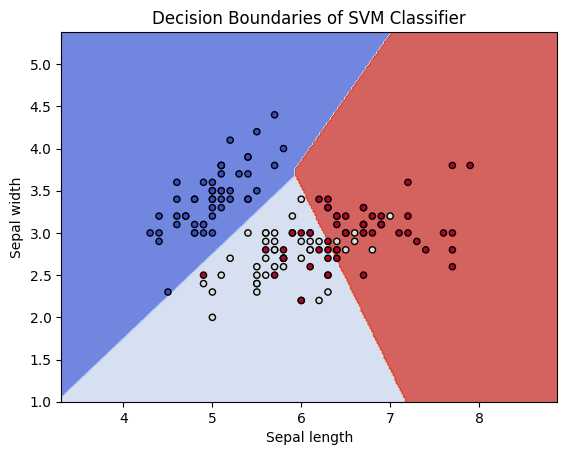

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Selecting only two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

# Predict on the training set to get accuracy
y_train_pred = svm_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Predict on the testing set
y_test_pred = svm_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision Boundaries of SVM Classifier')
plt.show()
